<a href="https://colab.research.google.com/github/842Mono/CSEN1067_Machine_Learning_Project1/blob/master/Project2ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function

from time import time
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from array import *



##**Task 1**

In [45]:
print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(funneled=True,min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
# print(h,w)

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
X = preprocessing.StandardScaler().fit_transform(X)
# print(X)

n_features = X.shape[1]
# print(X.shape)
# print(n_features)

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
# print(y)
# print(y.shape)
# print(target_names)

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Automatically created module for IPython interactive environment
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [0]:
# #############################################################################
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42)



In [8]:
# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
# print(pca)


print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))
print("eigenfaces = ",eigenfaces.shape)
# print("eigenfaces = ",eigenfaces[0])

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')


print("Done.....")

Extracting the top 150 eigenfaces from 966 faces
done in 0.440s
eigenfaces =  (150, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
done in 0.036s
Done.....


In [10]:
#task 1-part 1
# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1, 10, 100, 1e3],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Done.....")




Fitting the classifier to the training set
done in 59.308s
Best estimator found by grid search:
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Done.....


In [11]:
# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print("-------")
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

print("Done.....")

Predicting people's names on the test set
done in 0.081s
                   precision    recall  f1-score   support

     Ariel Sharon       0.64      0.69      0.67        13
     Colin Powell       0.75      0.87      0.81        60
  Donald Rumsfeld       0.77      0.74      0.75        27
    George W Bush       0.94      0.90      0.92       146
Gerhard Schroeder       0.75      0.84      0.79        25
      Hugo Chavez       0.82      0.60      0.69        15
       Tony Blair       0.85      0.78      0.81        36

      avg / total       0.85      0.84      0.84       322

-------
[[  9   0   2   2   0   0   0]
 [  2  52   2   2   1   1   0]
 [  2   3  20   2   0   0   0]
 [  1   6   1 132   3   1   2]
 [  0   2   0   1  21   0   1]
 [  0   2   0   1   1   9   2]
 [  0   4   1   1   2   0  28]]
Done.....


In [12]:
# Task 1-part 2
# # Create the Scaler object
X_scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
# # Fit your data on the scaler object
scaled_df = X_scaler.fit_transform(X_train)
#print(scaled_df)

print("Fitting the classifier to the training set")
t0 = time()
param_grid_SVC = {'C': [1, 10, 100, 1e3],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf_SVC = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                           param_grid_SVC, cv=5)

clf_SVC = clf_SVC.fit(scaled_df, y_train)

print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf_SVC.best_estimator_)
print("Done.....")

Fitting the classifier to the training set
done in 671.814s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Done.....


In [51]:
##################### task1-part 3 ########################
# # 50, 150, 190, 300, 700

n_components =  [50, 150, 190, 300, 700]
c_array = []
train_set = []
average =[]
eigenfaces_array = []
predict_array = []

for i in range(len(n_components)):
  print("Extracting the top %d eigenfaces from %d faces"
        % (n_components[i], X_train.shape[0]))
  t0 = time()
  pca = PCA(n_components = n_components[i], svd_solver='randomized',
            whiten=True).fit(X_train)
  # print(pca)
  #print("done in %0.3fs" % (time() - t0))
  sum_all=0
  match=0
  
  eigenfaces = pca.components_.reshape((n_components[i], h, w))
  print("eigenfaces = ",eigenfaces.shape)
  eigenfaces_array.append(eigenfaces)
  # print("eigenfaces = ",eigenfaces[0])

  print("Projecting the input data on the eigenfaces orthonormal basis")
  t0 = time()
  x_train_pca = pca.transform(X_train)
#   train_set.append(x_train_pca)
#   print("x_train_pca",len(x_train_pca))
  x_test_pca = pca.transform(X_test)
#   print("done in %0.3fs" % (time() - t0))
#   print("x_test_pca",len(x_test_pca))
 
  
  t0 = time()
  param_grid = {'C': [1, 10, 100, 1e3],
                'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
  clf_new = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                             param_grid, cv=5)
  
  clf_new = clf_new.fit(x_train_pca, y_train)
  
  y_pred_new = clf_new.predict(x_test_pca)
  predict_array.append(y_pred_new)
#   print("y_pred_new",len(y_pred_new))
#   print("y_test",len(y_test))
  
  #calculate accuracy
  for ii in range(0,len(y_pred_new)):
    sum_all=len(y_pred_new)
    if y_pred_new[ii]==y_test[ii]:
      match+=1
  average.append(match/sum_all) 
  print("average :",average)
  
 
  
  print("done in %0.3fs" % (time() - t0))
  print("Best estimator found by grid search:")
#   print(clf.best_estimator_)
  c_value = clf_new.best_estimator_.C
  c_array.append(c_value)
  print(c_value)
print("c_array",c_array)
# print("train_set",train_set)
# print('clf_new : ',clf_new)
print("Done.....")



Extracting the top 50 eigenfaces from 966 faces
eigenfaces =  (50, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
average : [0.8509316770186336]
done in 20.386s
Best estimator found by grid search:
10
Extracting the top 150 eigenfaces from 966 faces
eigenfaces =  (150, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
average : [0.8509316770186336, 0.8478260869565217]
done in 59.035s
Best estimator found by grid search:
10
Extracting the top 190 eigenfaces from 966 faces
eigenfaces =  (190, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
average : [0.8509316770186336, 0.8478260869565217, 0.8385093167701864]
done in 75.172s
Best estimator found by grid search:
10
Extracting the top 300 eigenfaces from 966 faces
eigenfaces =  (300, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
average : [0.8509316770186336, 0.8478260869565217, 0.8385093167701864, 0.782608695652174]
done in 123.096s
Best estimator fou

Text(0.5,1,'graph 1')

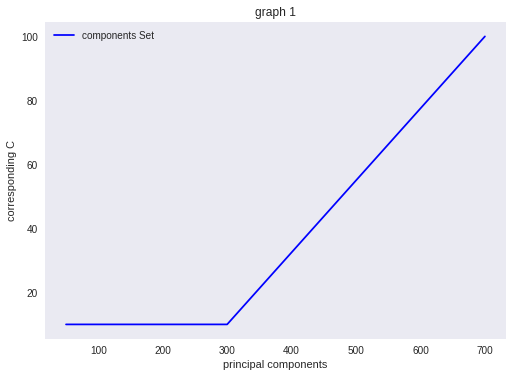

In [52]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

plt.plot(n_components[:], c_array[:],c='b', label='components Set')
ax.grid()
ax.legend(loc='best')
ax.set_xlabel('principal components')
ax.set_ylabel('corresponding C')
ax.set_title('graph 1')
  


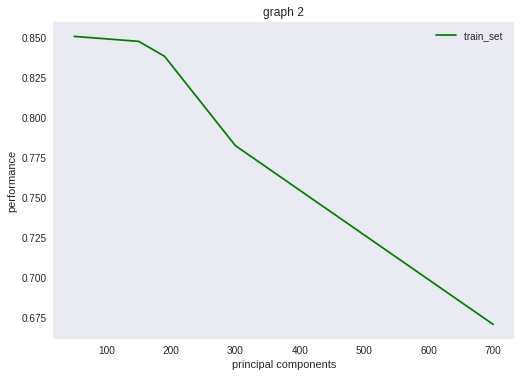

In [53]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

plt.plot(n_components[:],average[:],c='g', label='train_set ')
ax.grid()
ax.legend(loc='best')
ax.set_xlabel('principal components')
ax.set_ylabel('performance')
ax.set_title('graph 2')
  
plt.show()

In [0]:
# #############################################################################
# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)



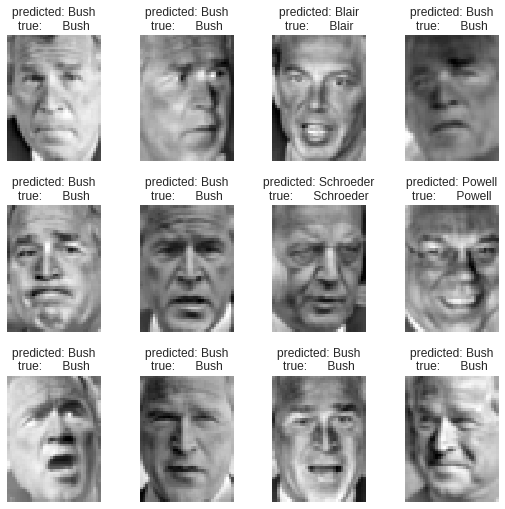

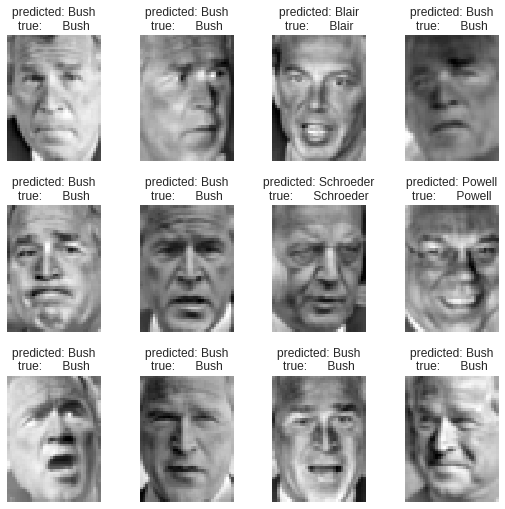

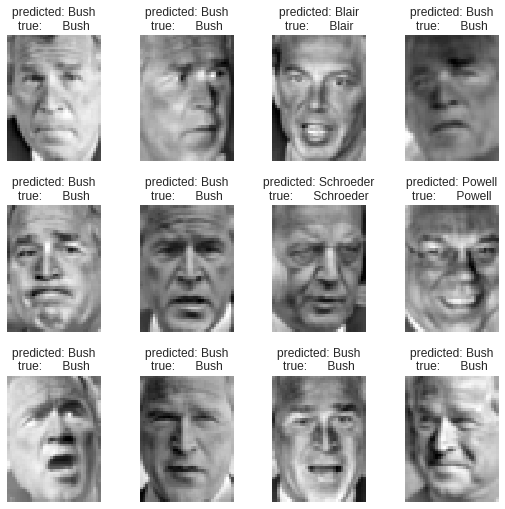

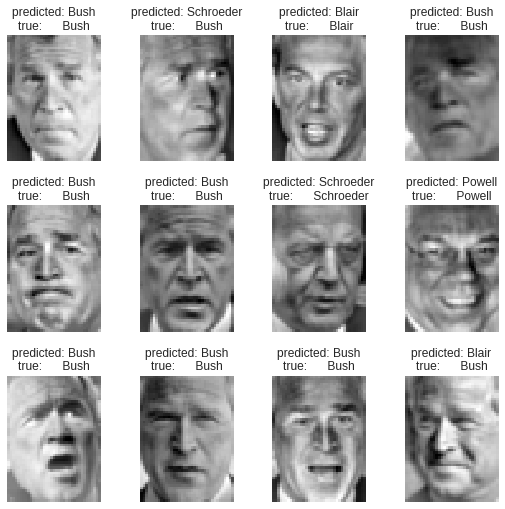

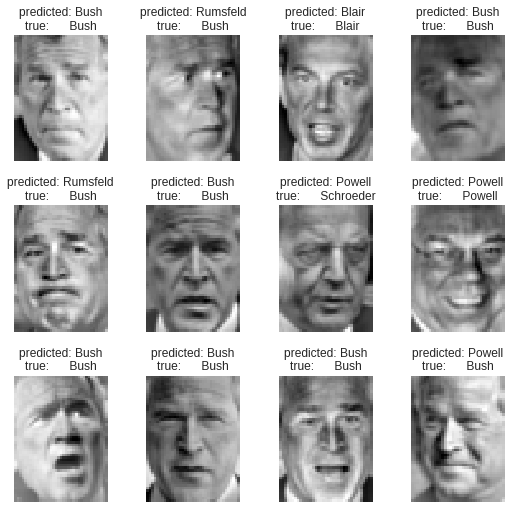

In [55]:
for j in range(len(predict_array)):
  prediction_titles_new = [title(predict_array[j], y_test, target_names, i)
                           for i in range(predict_array[j].shape[0])]

  plot_gallery(X_test, prediction_titles_new, h, w)


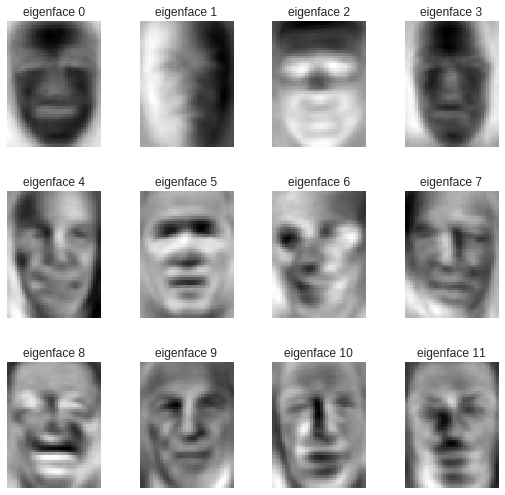

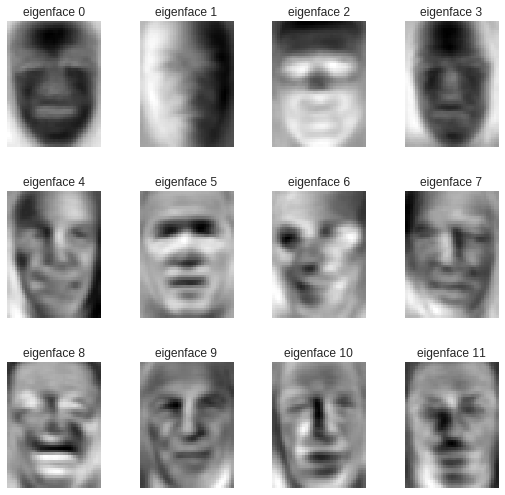

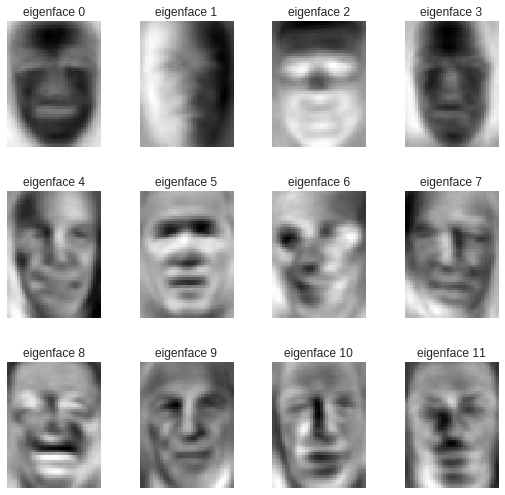

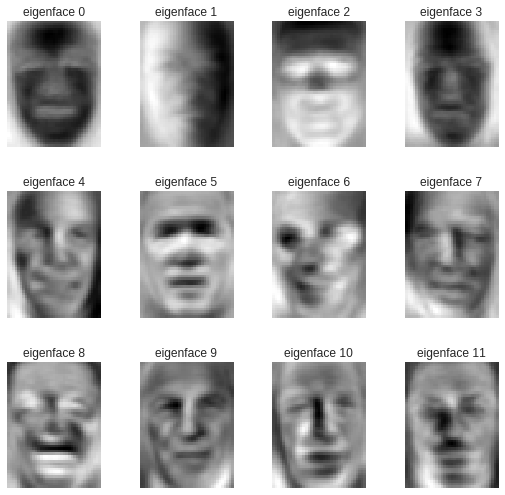

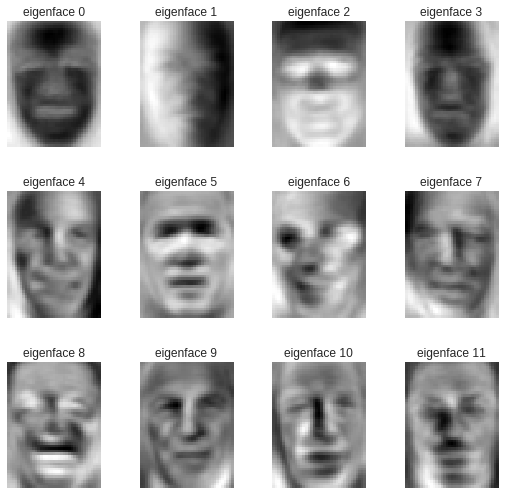

In [61]:
# plot the gallery of the most significative eigenfaces
for j in range(len(eigenfaces_array)):
  eigenface_titles_new = ["eigenface %d" % i for i in range(eigenfaces[j].shape[0])]
  plot_gallery(eigenfaces_array[j], eigenface_titles_new, h, w)

plt.show()

In [40]:
#unfunneled

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

un_lfw_people = fetch_lfw_people(funneled=False,min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
un_n_samples, hh, ww = un_lfw_people.images.shape


# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X_un_lfw = un_lfw_people.data
X_un_lfw = preprocessing.StandardScaler().fit_transform(X_un_lfw)


un_n_features = X_un_lfw.shape[1]


# the label to predict is the id of the person
y_un_lfw = un_lfw_people.target
target_names = un_lfw_people.target_names
un_n_classes = target_names.shape[0]


print("Total dataset size:")
print("n_samples: %d" % un_n_samples)
print("n_features: %d" % un_n_features)
print("n_classes: %d" % un_n_classes)

# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
un_pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print(un_pca)


print("done in %0.3fs" % (time() - t0))

un_eigenfaces = un_pca.components_.reshape((n_components, hh, ww))
print("eigenfaces = ",un_eigenfaces.shape)
# print("eigenfaces = ",eigenfaces[0])

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
un_X_train_pca = un_pca.transform(X_train)
un_X_test_pca = un_pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

2018-12-01 23:32:35,010 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976018


Automatically created module for IPython interactive environment


/usr/local/lib/python3.6/dist-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/usr/local/lib/python3.6/dist-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/usr/local/lib/python3.6/dist-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/usr/local/lib/python3.6/dist-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/usr

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)
done in 0.331s
eigenfaces =  (150, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
done in 0.037s


##**Task 2**